In [523]:
import numpy as np
import matplotlib.pyplot as plt
from plot_params import * 
from scipy.spatial.distance import cdist
import math
from copy import deepcopy

In [641]:
def Generate_charges(n_charges, radius):
    r = radius * np.sqrt(np.random.rand(n_charges))
    theta = np.random.rand(n_charges) * 2 * np.pi
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.array([[a, b] for a,b in zip(x,y)])

def Calculate_Etot(positions):
    dist = cdist(positions,positions,'euclidean')
    #print(1/dist[dist>0])
    #print(np.sum(1/dist[dist>0]))
    return np.sum(1/dist[dist>0])

def Calculate_step(positions, i_particle):
    step_constant = 0.01
    Etot = Calculate_Etot(positions)
    x = pos[:,0]
    x_dist = x.reshape(-1, 1) - x
    x_dist = x_dist.transpose()
    x_step = np.sum(x_dist[:,i_particle])
    y = pos[:,1]
    y_dist = y.reshape(-1, 1) - y
    y_dist = y_dist.transpose()
    y_step = np.sum(y_dist[:,i_particle])
    force = step_constant * Etot**3 * np.array([x_step,y_step])
    return force

def Inside_circle(point, r_max):
    r = math.sqrt(point[0]**2+point[1]**2)
    #print(point,r)
    #print(r<=r_max)
    return r<=r_max

accept [2.67905523 3.47026843]
accept [ 0.48347292 -1.90434798]
accept [0.43048315 1.34145187]
accept [ 0.39464067 -2.26175191]
accept [ 0.31234089 -2.59287339]
accept [2.82307386 3.72589604]
accept [ 0.24107403 -2.87082717]
accept [0.37642876 1.38629725]
accept [2.94479844 3.94221079]
accept [ 0.17950467 -3.11089897]
accept [0.32896189 1.42515397]
accept [ 0.12954397 -3.299162  ]
accept [ 0.08108499 -3.48176624]
accept [0.29208329 1.45066239]
accept [0.25446888 1.47667976]
accept [ 0.03567057 -3.65741319]
accept [-0.00865472 -3.82884783]
accept [0.22083749 1.50497956]
accept [0.18760856 1.53059718]
accept [0.15383125 1.55663758]
accept [-0.04853503 -3.98662474]
accept [-0.08645552 -4.135031  ]
accept [-0.1226519  -4.27532884]
accept [-0.15825646 -4.41333272]
accept [-0.1933133  -4.54921371]
accept [-0.22695307 -4.67858283]
accept [0.12982045 1.57921392]
accept [0.10599422 1.60039895]
accept [-0.25731713 -4.79455623]
accept [-0.28730665 -4.90909908]
accept [0.08435341 1.61953834]
accep

accept [-1.81465697  3.01033088]
accept [-1.81904223  3.01358433]
accept [-1.82341982  3.01684364]
accept [-1.82780039  3.02010516]
accept [-1.83215177  3.02331085]
accept [-1.83646951  3.02648049]
accept [-1.84079012  3.02965224]
accept [-1.84511359  3.03282609]
accept [-1.84943994  3.03600205]
accept [-1.85376914  3.03918011]
accept [-1.85807039  3.04233764]
accept [-1.86237446  3.04549725]
accept [-1.86668136  3.04865893]
accept [-1.87098098  3.05182612]
accept [-1.87526821  3.05498421]
accept [-1.87955311  3.05812983]
accept [-1.8838207  3.0612521]
accept [-1.88809103  3.06437638]
accept [-1.89234446  3.06750938]
accept [-1.8965712   3.07062268]
accept [-1.90076677  3.07370273]
accept [-1.90496015  3.07677097]
accept [-1.90914672  3.07984437]
accept [-1.9133078   3.08292929]
accept [-1.91747149  3.08601614]
accept [-1.92163778  3.08910492]
accept [-1.92580667  3.09219563]
accept [-1.92996887  3.09529141]
accept [-1.93413366  3.09838911]
accept [-1.93830104  3.10148874]
accept [-1.9

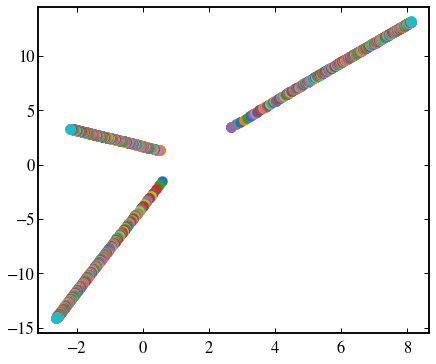

In [663]:
n_charges = 3
step_constant = 0.5
radius = 5
pos = Generate_charges(n_charges, radius)
T_initial = 10
T = T_initial
n_steps = 1000
#plt.scatter(pos[:,0], pos[:,1])
for i in range(n_steps):
    E_tot = Calculate_Etot(pos)
    i_particle = np.random.randint(n_charges)
    step = Calculate_step(pos, i_particle)
    pos_new = pos
    pos_new[i_particle, :]+=step
    E_new = Calculate_Etot(pos_new)
    delta_E = E_new - E_tot
    u = np.random.rand()
    #print(min(math.exp(-delta_E/T), 1))
    alpha = min(math.exp(-delta_E/T), 1)
    #print()
    if Inside_circle(pos_new[i_particle, :],radius) & (u <= alpha):
        print('accept', pos_new[i_particle, :])
        pos = pos_new
    T=T*0.999
    plt.scatter(pos[:,0], pos[:,1])

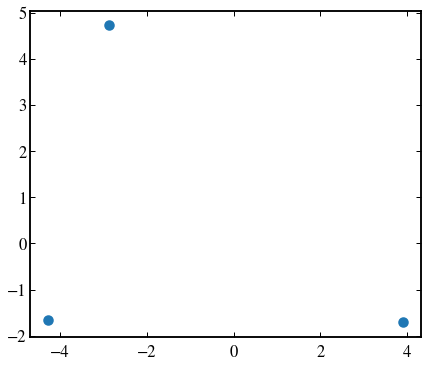

In [622]:
E_tot = Calculate_Etot(pos)
i_particle = np.random.randint(n_charges)
step = Calculate_step(pos, i_particle)
pos_new = pos
pos_new[i_particle, :]+=step
E_new = Calculate_Etot(pos_new)
delta_E = E_new - E_tot
u = np.random.rand()
#print(min(math.exp(-delta_E/T), 1))
alpha = min(math.exp(-delta_E/T), 1)
if Inside_circle(pos_new[i_particle, :],radius) & (u <= alpha):
    pos = pos_new
T=T*0.999
plt.scatter(pos[:,0], pos[:,1])

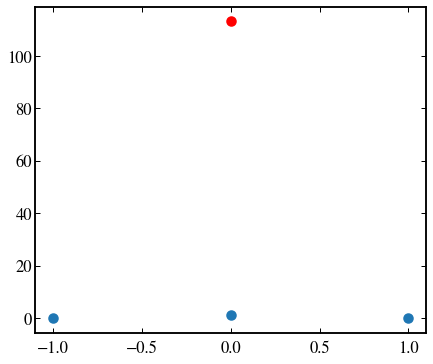

In [615]:
pos = np.array([[0,1],[-1,0],[1,0]], dtype='float64')
plt.scatter(pos[:,0], pos[:,1])
step = Calculate_step(pos, 0)
pos_new = pos
pos_new[0, :]+=step
plt.scatter(pos[0,0], pos[0,1],c='r')

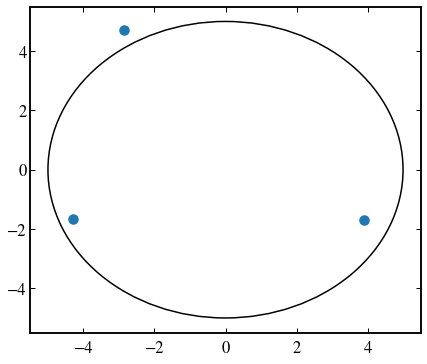

In [623]:
plt.scatter(pos[:,0], pos[:,1])
circle1 = plt.Circle((0,0),radius, fill=False)
plt.gca().add_patch(circle1)

In [ ]:
#test

pos = Generate_charges(n_charges, 5)
print(pos)
dist = cdist(pos,pos,'euclidean')
print(dist)